In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
#for ipynb
%matplotlib inline
import yaml

In [2]:
#get list of files with data
in_dict = {'short-fragments':'../TFBS_short_fragment_sizes_nucleosome_profiling_v2/results/',
           'all-fragments':'../TFBS_all_fragment_sizes_nucleosome_profiling_v2/results',
          'DHS':'../DHS_nucleosome_profiling/results',
          'CNA-corrected':'../CNA_correction_TFBS_nucleosome_profiling_v2/results/'}

samples_yaml = '../TFBS_nucleosome_profiling_unfiltered_v2/config/samples.GC.yaml'
tfx_path = '../../metadata/delfi/analysis/Delfi_tumor_fraction_data.txt'
metadata_path = '../../../griffin_paper/data/delfi_metadata/analysis/matched_metadata_corrected.txt'

with open(samples_yaml, 'r') as f:
    samples = yaml.safe_load(f)
samples = samples['samples']
samples = list(samples.keys())  
    
in_files = {}
for group in in_dict.keys():
    in_dir = in_dict[group]
    in_files[group] = []
    for sample in samples:
        in_files[group].append(in_dir+'/'+sample+'/'+sample+'.GC_corrected.coverage.tsv')
    print(group,len(in_files[group]))    

short-fragments 423
all-fragments 423
DHS 423
CNA-corrected 423


In [3]:
#get columns with coverage data
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [4]:
#import data
start_time = time.time()
data = pd.DataFrame()
for group in in_files.keys():
    for i,file in enumerate(in_files[group]):
        if i%100==0:
            print(i,'importing',file,np.round(time.time()-start_time))
        current = pd.read_csv(file,sep='\t')
        current['site_group'] = group
        data = data.append(current, ignore_index=True)
        

0 importing ../TFBS_short_fragment_sizes_nucleosome_profiling_v2/results//Bile_Duct_Cancer_CGPLPA114/Bile_Duct_Cancer_CGPLPA114.GC_corrected.coverage.tsv 0.0
100 importing ../TFBS_short_fragment_sizes_nucleosome_profiling_v2/results//Colorectal_Cancer_CGCRC321/Colorectal_Cancer_CGCRC321.GC_corrected.coverage.tsv 1.0
200 importing ../TFBS_short_fragment_sizes_nucleosome_profiling_v2/results//Healthy_CGPLH365/Healthy_CGPLH365.GC_corrected.coverage.tsv 4.0
300 importing ../TFBS_short_fragment_sizes_nucleosome_profiling_v2/results//Healthy_CGPLH479/Healthy_CGPLH479.GC_corrected.coverage.tsv 8.0
400 importing ../TFBS_short_fragment_sizes_nucleosome_profiling_v2/results//Pancreatic_Cancer_CGPLPA37/Pancreatic_Cancer_CGPLPA37.GC_corrected.coverage.tsv 12.0
0 importing ../TFBS_all_fragment_sizes_nucleosome_profiling_v2/results/Bile_Duct_Cancer_CGPLPA114/Bile_Duct_Cancer_CGPLPA114.GC_corrected.coverage.tsv 13.0
100 importing ../TFBS_all_fragment_sizes_nucleosome_profiling_v2/results/Colorectal_C

In [5]:
data.set_index('sample')

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,central_coverage,amplitude,outlier_cutoff,exclude_zero_mappability,correction,number_of_sites,site_name,smoothing,CNA_normalization,site_group
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,1.00412,1.01139,1.00530,0.99787,0.99509,0.99088,1.00128,1.00909,1.01023,1.01953,...,0.93965,0.28903,3.0,True,GC_corrected,30000,AHR.hg38.30000,True,False,short-fragments
Bile_Duct_Cancer_CGPLPA114,0.97745,0.97596,0.96671,0.96017,0.96870,0.97717,0.99010,0.98724,0.98936,0.98893,...,1.04351,0.52868,2.0,True,GC_corrected,30000,AR.hg38.30000,True,False,short-fragments
Bile_Duct_Cancer_CGPLPA114,1.01485,1.00332,0.99676,0.99440,1.00255,0.99792,1.01012,1.01261,1.00228,1.00710,...,0.97547,0.46217,2.0,True,GC_corrected,30000,ARNT.hg38.30000,True,False,short-fragments
Bile_Duct_Cancer_CGPLPA114,0.99957,0.98963,0.98242,0.98770,0.98690,0.98280,0.98611,0.99789,1.00376,1.00839,...,1.07944,0.57960,2.0,True,GC_corrected,30000,ARNTL.hg38.30000,True,False,short-fragments
Bile_Duct_Cancer_CGPLPA114,0.99811,1.01162,1.00171,1.00271,0.99883,0.99966,1.00546,0.99193,0.99875,0.99497,...,1.01428,0.21483,3.0,True,GC_corrected,30000,ASCL1.hg38.30000,True,False,short-fragments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA95,0.95919,0.95702,0.95110,0.94321,0.93208,0.93355,0.92986,0.93343,0.93740,0.94306,...,0.95953,0.48123,6.0,True,GC_corrected,30000,ZNF467.hg38.30000,True,True,CNA-corrected
Pancreatic_Cancer_CGPLPA95,0.95382,0.94810,0.94267,0.94145,0.94364,0.94187,0.94631,0.95033,0.95796,0.96020,...,1.00239,0.42697,6.0,True,GC_corrected,30000,ZNF554.hg38.30000,True,True,CNA-corrected
Pancreatic_Cancer_CGPLPA95,0.91883,0.89470,0.87548,0.86201,0.86845,0.87796,0.89585,0.91508,0.93737,0.94566,...,0.79058,2.98453,5.0,True,GC_corrected,30000,ZNF580.hg38.30000,True,True,CNA-corrected


In [6]:
#get the metadata
#get the metadata
metadata1 = pd.read_csv(metadata_path, sep='\t')
metadata1 = metadata1[['new_sample_name','Stage','Age at Diagnosis', 'Gender']].set_index('new_sample_name') 
metadata2 = pd.read_csv(tfx_path, sep='\t')
metadata2 = metadata2[['sample','tumor_fraction','sample_type']].set_index('sample') 
metadata = metadata1.merge(metadata2, left_index = True, right_index=True)
metadata = metadata.reset_index()
metadata = metadata.rename(columns = {'index':'sample'})
metadata['status'] = np.where(metadata['sample_type'].str.contains('ancer'),1,0)
metadata['Stage'] = metadata['Stage'].str.strip(' ')

metadata_columns = ['sample','tumor_fraction','status','sample_type','Stage','Age at Diagnosis', 'Gender']
metadata = metadata[metadata_columns]
print("metadata:",len(metadata))


#merge with data
print(len(data))
data = data.merge(metadata, on = 'sample')
print(len(data))

metadata: 423
349398
349398


In [7]:
data

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,smoothing,CNA_normalization,sample,site_group,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender
0,1.00412,1.01139,1.00530,0.99787,0.99509,0.99088,1.00128,1.00909,1.01023,1.01953,...,True,False,Bile_Duct_Cancer_CGPLPA114,short-fragments,0.02606,1,Bile_Duct_Cancer,II,NaN,F
1,0.97745,0.97596,0.96671,0.96017,0.96870,0.97717,0.99010,0.98724,0.98936,0.98893,...,True,False,Bile_Duct_Cancer_CGPLPA114,short-fragments,0.02606,1,Bile_Duct_Cancer,II,NaN,F
2,1.01485,1.00332,0.99676,0.99440,1.00255,0.99792,1.01012,1.01261,1.00228,1.00710,...,True,False,Bile_Duct_Cancer_CGPLPA114,short-fragments,0.02606,1,Bile_Duct_Cancer,II,NaN,F
3,0.99957,0.98963,0.98242,0.98770,0.98690,0.98280,0.98611,0.99789,1.00376,1.00839,...,True,False,Bile_Duct_Cancer_CGPLPA114,short-fragments,0.02606,1,Bile_Duct_Cancer,II,NaN,F
4,0.99811,1.01162,1.00171,1.00271,0.99883,0.99966,1.00546,0.99193,0.99875,0.99497,...,True,False,Bile_Duct_Cancer_CGPLPA114,short-fragments,0.02606,1,Bile_Duct_Cancer,II,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349393,0.95919,0.95702,0.95110,0.94321,0.93208,0.93355,0.92986,0.93343,0.93740,0.94306,...,True,True,Pancreatic_Cancer_CGPLPA95,CNA-corrected,0.04484,1,Pancreatic_Cancer,II,64.0,F
349394,0.95382,0.94810,0.94267,0.94145,0.94364,0.94187,0.94631,0.95033,0.95796,0.96020,...,True,True,Pancreatic_Cancer_CGPLPA95,CNA-corrected,0.04484,1,Pancreatic_Cancer,II,64.0,F
349395,0.91883,0.89470,0.87548,0.86201,0.86845,0.87796,0.89585,0.91508,0.93737,0.94566,...,True,True,Pancreatic_Cancer_CGPLPA95,CNA-corrected,0.04484,1,Pancreatic_Cancer,II,64.0,F
349396,0.97445,0.97373,0.97208,0.97609,0.97136,0.96691,0.97153,0.96722,0.96661,0.96114,...,True,True,Pancreatic_Cancer_CGPLPA95,CNA-corrected,0.04484,1,Pancreatic_Cancer,II,64.0,F


In [8]:
print(len(data['site_name'].unique()))
print(len(data['sample'].unique()))
print(len(data))
print(len(data['site_name'].unique())*len(data['sample'].unique())*len(data['site_group'].unique()))


286
423
349398
483912


In [9]:
data['number_of_sites'].unique()

array([30000, 10000])

In [10]:
data['Stage'].unique()

array(['II', 'IV', 'I', 'III', 'X', '0', nan], dtype=object)

In [11]:
#get the key columns
data = data[metadata_columns+['site_name','correction','site_group',
                              'central_coverage','amplitude','mean_coverage']+str_plot_columns]
print(len(data))

site_groups = in_dict.keys()

site_names = data['site_name'].unique()

for group,df in data.groupby('site_group'):
    print(group,len(df['site_name'].unique()))

    #df.to_csv('merged_data/'+group+'_data_with_features.txt', sep='\t', index=False)
    
    #reformat for logistic regression
    reformatted = df[metadata_columns+['site_name','site_group','central_coverage','amplitude','mean_coverage']]
    reformatted = reformatted.set_index(metadata_columns+['site_group','site_name']).unstack()
    new_column_names = []
    for item in reformatted.columns.values:
        new_column_names.append('_'.join(item))
    reformatted.columns = new_column_names
    reformatted.to_csv('merged_data/'+group+'_reformatted.txt', sep='\t')
    print(reformatted.shape)

349398
CNA-corrected 270
(423, 810)
DHS 16
(423, 48)
all-fragments 270
(423, 810)
short-fragments 270
(423, 810)


In [12]:
810/3

270.0

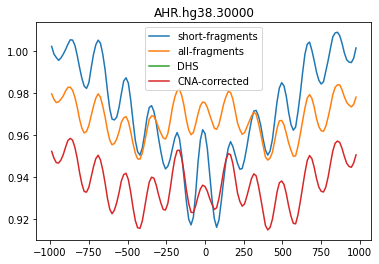

In [13]:
#plot
for site_name in data['site_name'].unique():
    for site_group in data['site_group'].unique():
        current = data[(data['site_name']==site_name) & (data['site_group']==site_group)][str_plot_columns].mean()
        plt.plot(plot_columns,current, label=site_group)
    plt.title(site_name)
    plt.legend()
    break




fft real -0.23904449067618147
fft imag -0.07370623820185943
fft magn 0.250149711318051
sum x coords -0.23904449067619404
sum y coords -0.07370623820188099
magnitude: 0.25014971131806935


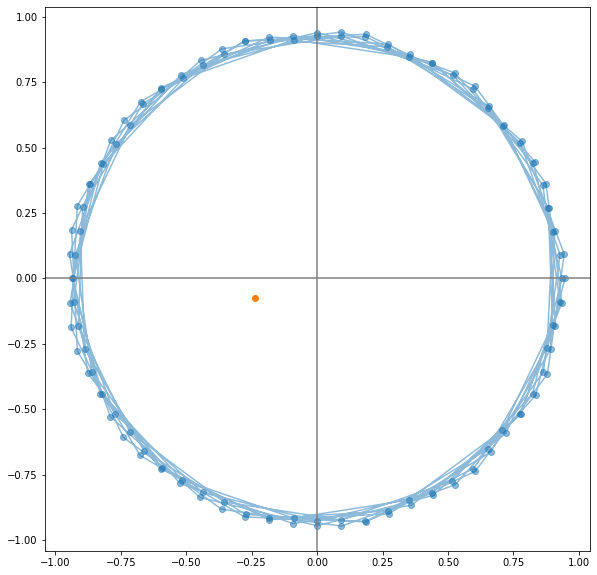

In [14]:
fft_columns = np.arange(-960,960,15)
str_fft_columns = [str(m) for m in fft_columns]

#plot out what the fft is doing for a given frequency
demo_res = np.fft.fft(current[str_fft_columns])
demo_signal = current[str_fft_columns]

frequency = 10
print('fft real', demo_res[frequency].real)
print('fft imag', demo_res[frequency].imag)
print('fft magn',np.abs(demo_res[frequency]))

#get angles for rotation
angles = np.linspace(0,2*np.pi,len(demo_signal)+1)
angles = -angles[0:-1]

#wrapped at frequency
heights = np.sin(angles*frequency)*demo_signal
widths = np.cos(angles*frequency)*demo_signal
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(widths,heights, alpha = 0.5)
ax.scatter(widths,heights, alpha = 0.5)
ax.set_aspect('equal')
ax.scatter(sum(widths),sum(heights))
ax.axvline(0, color = 'grey')
ax.axhline(0, color = 'grey')
print('sum x coords',sum(widths))
print('sum y coords',sum(heights))
print('magnitude:',np.sqrt(sum(widths)**2+sum(heights)**2))

In [15]:
# from scipy.signal import find_peaks
# plt.plot(fft_columns,current)
# peaks =  [fft_columns[m] for m in find_peaks(current)[0]]
# plt.scatter(peaks,[.99 for m in peaks])
# print(peaks)

# spacing = []
# for i in range(len(peaks)-1):
#     spacing.append(peaks[i+1]-peaks[i])
# np.mean(spacing)